## Term Project Milestone 5
### Course: DSC 540
### Author: Holly Figueroa
### Objective: Upload and merge data frames to SQL database. Provide visualizations for data.

In [1]:
 #conn.close()

In [2]:
# Load libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The previous milestones have left me with two collections of dataframes to be merged into two separate tables. I will create a table of nursing home variables at the state level including averaged and sum data regarding all the nursing homes in the state, population demographics, and state spending. I will create a second table of nursing home variables at the county level including nursing home data for each county and county population demographics. 

In [3]:
# Bring in state level CSV files to dataframes to be merged
state_nursing = pd.DataFrame(pd.read_csv('state_nursing.csv'))
state_people = pd.DataFrame(pd.read_csv('state_people.csv'))
state_spending = pd.DataFrame(pd.read_csv('state_spending.csv'))


# Bring in county level CSV files to dataframes be merged
county_nursing = pd.DataFrame(pd.read_csv('county_nursing.csv'))
county_people = pd.DataFrame(pd.read_csv('county_people.csv'))

In [4]:
# Connect python to SQL server and create new database file
conn = sqlite3.connect('USA_nursing.db')

In [5]:
# function to confirm a database connection is open
def check_connection(conn):
    try:
        conn.cursor()
        return True
    except Exception as ex:
        return False

In [6]:
check_connection(conn)

True

In [7]:
# Create cursor to interact with database using commands
c = conn.cursor()

In [8]:
# STATE NURSING 1/3 STATE TABLES
# Creating a table called state starting with data from 
# Naming columns and identifying their data type
c.execute('''
            CREATE TABLE state (
                state TEXT PRIMARY KEY, 
                overall_rating FLOAT, 
                health_insp_rating FLOAT,
                qm_rating FLOAT,
                longstay_qm_rating FLOAT,
                shortstay_qm_rating FLOAT, 
                staffing_rating FLOAT,
                rn_staffing_rating FLOAT,
                nursing_turnover FLOAT,
                rn_turnover FLOAT,
                admin_turnover FLOAT,
                nurse_aide_hrspres FLOAT,
                lpn_hrspres FLOAT,
                rn_hrspres FLOAT,
                total_nurse_hrspres FLOAT,
                total_weighted_health_survey_score FLOAT,
                nursing_home_count INT,
                reported_incidents INT,
                substantiated_complaints INT,
                infection_control_citations INT,
                num_fines INT,
                fines_dollar_total FLOAT,
                num_payment_denials INT,
                total_penalties FLOAT
                )
            ''')
       

In [9]:
state_nursing.to_sql(con = conn, name = 'state', if_exists = 'append', index = False)

In [10]:
# Check length equals df length 53
rows = c.execute("SELECT * FROM state")

# Create counter variable
length = 0

# Iterate through rows fo data to get row count
for row in rows:
    length+=1
print(length )   

53


In [11]:
# Print some of the rows to check
rows5 = c.execute("SELECT * FROM state LIMIT 5")

# Iterate through rows and print
for row in rows5:
    print(row)

('Alaska', 3.85, 2.83, 4.0, 3.85, 4.7, 4.82, 4.82, 53.36, 46.96, 0.76, 4.9, 0.68, 2.91, 8.29, 100.2762261904762, 20, 80, 20, 24, 49, 876398.07, 0, 49.0)
('Alabama', 3.66, 3.19, 3.65, 3.49, 3.56, 3.4, 3.32, 47.54, 38.7, 1.07, 2.45, 1.01, 0.73, 4.14, 22.161920232869267, 227, 62, 113, 60, 198, 2366700.8400000003, 7, 205.0)
('Arkansas', 3.28, 3.05, 3.58, 3.8, 3.3, 2.8, 2.33, 55.52, 51.13, 0.57, 2.64, 1.14, 0.5, 4.27, 72.46768665812384, 220, 58, 1048, 955, 381, 4196949.58, 44, 425.0)
('Arizona', 2.99, 2.46, 3.86, 3.84, 3.82, 3.09, 3.4, 55.11, 55.81, 1.0, 2.06, 0.88, 0.83, 3.74, 82.69835858585859, 142, 219, 151, 220, 235, 1803487.13, 11, 246.0)
('California', 3.28, 2.86, 4.12, 4.11, 4.04, 2.78, 2.44, 49.73, 53.02, 1.0, 2.6, 1.23, 0.64, 4.43, 89.4209218632812, 1176, 4470, 8543, 1683, 1996, 21527811.480000004, 77, 2073.0)


In [12]:
# Commiting changes
conn.commit()

In [13]:
# View columns to copy as table headers
state_people.columns

Index(['State', 'Population', 'Race_White', 'Race_Black', 'Race_Asian',
       'Race_Native', 'Race_Hispanic', 'Race_Multi', 'Alone_65', 'Under18',
       'Over65', 'UnderHS', 'Ed_HSDiploma', 'Ed_SomeCollege', 'Ed_Assoc',
       'Ed_Degree'],
      dtype='object')

In [14]:
# STATE PEOPLE 2/3 STATE TABLES
c.execute('''
            CREATE TABLE state2 (
                state TEXT PRIMARY KEY, 
                Population INT,
                Race_White FLOAT, 
                Race_Black FLOAT,
                Race_Asian FLOAT,
                Race_Native FLOAT,
                Race_Hispanic FLOAT,
                Race_Multi FLOAT,
                Alone_65 FLOAT,                
                Under18 FLOAT,
                Over65 FLOAT,
                UnderHS FLOAT,
                Ed_HSDiploma FLOAT,
                Ed_SomeCollege FLOAT,
                Ed_Assoc FLOAT,
                Ed_Degree FLOAT
                )
            ''')


In [15]:
state_people.to_sql(con = conn, name = 'state2', if_exists = 'append', index = False)

In [16]:
# Print some of the rows to check
rows5 = c.execute("SELECT * FROM state2 LIMIT 5")

# Iterate through rows and print
for row in rows5:
    print(row)

('Alaska', 1463090, 62.24, 3.0, 5.12, 14.02, 5.37, 7.09, 2.69, 26.43, 7.74, 7.22, 28.12, 26.7, 8.53, 29.42)
('Alabama', 9806370, 65.35, 25.38, 1.08, 0.53, 3.79, 1.45, 4.45, 23.69, 13.73, 13.78, 30.74, 21.41, 8.5, 25.58)
('Arkansas', 6035608, 72.02, 14.82, 1.18, 0.67, 6.17, 1.89, 4.49, 24.44, 14.32, 13.41, 33.94, 22.32, 7.14, 23.19)
('Arizona', 14557434, 50.77, 3.28, 2.34, 3.54, 26.04, 3.0, 3.93, 25.51, 13.75, 12.87, 23.83, 25.16, 8.62, 29.52)
('California', 79024446, 37.85, 5.48, 12.09, 0.41, 35.47, 4.59, 3.14, 24.96, 11.4, 16.78, 20.57, 21.11, 7.85, 33.69)


In [17]:
state_spending.columns

Index(['State', 'Millions', 'PC_Basic_Ed', 'PC_Higher_Ed', 'PC_Public_Assist',
       'PC_Medicaid', 'PC_Corrections', 'PC_Transportation', 'PC_Other',
       'PC_Total'],
      dtype='object')

In [18]:
# STATE SPENDING 3/3 STATE TABLES
# Create table using df headers
c.execute('''
            CREATE TABLE state3 (
                state TEXT PRIMARY KEY,
                Millions INT,              
                PC_Basic_Ed,
                PC_Higher_Ed,
                PC_Public_Assist,
                PC_Medicaid,
                PC_Corrections,
                PC_Transportation,
                PC_Other,
                PC_Total
                )
            ''')

In [19]:
# Append rows to state funding table
state_spending.to_sql(con = conn, name = 'state3', if_exists = 'append', index = False)

In [20]:
# Print some of the rows to check
rows5 = c.execute("SELECT * FROM state3 LIMIT 5")

# Iterate through rows and print
for row in rows5:
    print(row)

('Alabama', 19138, 0.266, 0.26, 0.0, 0.09, 0.036, 0.039, 0.308, 1.0)
('Alaska', 7123, 0.199, 0.086, 0.008, 0.09, 0.049, 0.072, 0.495, 1.0)
('Arizona', 23401, 0.24, 0.247, 0.0, 0.143, 0.056, 0.092, 0.222, 1.0)
('Arkansas', 18221, 0.169, 0.208, 0.011, 0.089, 0.029, 0.059, 0.434, 1.0)
('California', 201372, 0.26, 0.082, 0.027, 0.176, 0.078, 0.071, 0.306, 1.0)


In [21]:
# Commit changes
conn.commit()

Now all there are three tables in my database; state, state2, and state3. All share a primary key for 'state' to make them easy to merge. Now I will create 2 tables for county level information on state population and nursing homes.

In [22]:
# View columns for first dataframe to create sql table
county_nursing.columns

Index(['state_county', 'nursing_home_count', 'overall_rating',
       'health_insp_rating', 'qm_rating', 'longstay_qm_rating',
       'shortstay_qm_rating', 'staffing_rating', 'rn_staffing_rating',
       'nursing_turnover', 'rn_turnover', 'admin_turnover',
       'nurse_aide_hrspres', 'lpn_hrspres', 'rn_hrspres',
       'total_nurse_hrspres', 'total_weighted_health_survey_score',
       'reported_incidents', 'substantiated_complaints',
       'infection_control_citations', 'num_fines', 'fines_dollar_total',
       'num_payment_denials', 'total_penalties'],
      dtype='object')

In [23]:
# COUNTY NURSING 1/2 COUNTY TABLES
# Creating a table called county starting with data from county_nursing
# Naming columns and identifying their data type
c.execute('''
            CREATE TABLE county (
                state_county TEXT PRIMARY KEY, 
                nursing_home_count INT,
                overall_rating FLOAT, 
                health_insp_rating FLOAT,
                qm_rating FLOAT,
                longstay_qm_rating FLOAT,
                shortstay_qm_rating FLOAT, 
                staffing_rating FLOAT,
                rn_staffing_rating FLOAT,
                nursing_turnover FLOAT,
                rn_turnover FLOAT,
                admin_turnover FLOAT,
                nurse_aide_hrspres FLOAT,
                lpn_hrspres FLOAT,
                rn_hrspres FLOAT,
                total_nurse_hrspres FLOAT,
                total_weighted_health_survey_score FLOAT,
                reported_incidents INT,
                substantiated_complaints INT,
                infection_control_citations INT,
                num_fines INT,
                fines_dollar_total FLOAT,
                num_payment_denials INT,
                total_penalties FLOAT
                )
            ''')
       

In [24]:
# Append rows to county table
county_nursing.to_sql(con = conn, name = 'county', if_exists = 'append', index = False)

In [25]:
# Print some of the rows to check
rows5 = c.execute("SELECT * FROM county LIMIT 5")

# Iterate through rows and print
for row in rows5:
    print(row)

('AL, Franklin', 4, 4.25, 4.0, 4.25, 4.5, 3.5, 4.0, 4.5, 54.1, 55.57, 1.0, 2.17, 0.89, 1.09, 4.05, 11.5, 0, 0, 0, 1, 655.14, 0, 1.0)
('AL, Talladega', 3, 4.0, 3.67, 2.67, 2.0, 2.33, 3.67, 3.33, 56.3, 42.2, 1.0, 2.66, 1.0, 0.74, 4.36, 13.778, 0, 0, 0, 1, 650.0, 0, 1.0)
('AL, Jackson', 3, 2.33, 2.67, 2.33, 2.0, 3.0, 2.0, 2.0, 52.5, 33.3, 1.0, 2.4, 0.97, 0.78, 4.09, 20.22233333333333, 0, 0, 1, 3, 2932.71, 0, 3.0)
('AL, Jefferson', 34, 2.15, 2.09, 3.12, 3.15, 3.07, 2.65, 2.59, 58.28, 55.07, 1.45, 2.17, 1.02, 0.57, 3.72, 34.666647058823536, 9, 39, 16, 37, 343424.26000000007, 1, 38.0)
('AL, Limestone', 2, 2.0, 2.0, 3.5, 3.5, 3.5, 2.5, 2.5, 50.0, 42.75, 1.0, 1.85, 0.88, 0.5, 3.19, 23.0, 3, 4, 0, 0, 0.0, 0, 0.0)


In [26]:
# View county people columns to use to make table headers
county_people.columns

Index(['state_county', 'Population', 'Race_White', 'Race_Black', 'Race_Asian',
       'Race_Native', 'Race_Hispanic', 'Race_Multi', 'Alone_65', 'Under18',
       'Over65', 'UnderHS', 'Ed_HSDiploma', 'Ed_SomeCollege', 'Ed_Assoc',
       'Ed_Degree'],
      dtype='object')

In [27]:
# COUNTY PEOPLE 2/2 COUNTY TABLES
# Create table headers
c.execute('''
            CREATE TABLE county2 (
                state_county TEXT PRIMARY KEY, 
                Population INT,
                Race_White FLOAT, 
                Race_Black FLOAT,
                Race_Asian FLOAT,
                Race_Native FLOAT,
                Race_Hispanic FLOAT,
                Race_Multi FLOAT,
                Alone_65 FLOAT,                
                Under18 FLOAT,
                Over65 FLOAT,
                UnderHS FLOAT,
                Ed_HSDiploma FLOAT,
                Ed_SomeCollege FLOAT,
                Ed_Assoc FLOAT,
                Ed_Degree FLOAT
                )
            ''')

In [28]:
# Append rows to county2 table
county_people.to_sql(con = conn, name = 'county2', if_exists = 'append', index = False)

In [29]:
# Print some of the rows to check
rows5 = c.execute("SELECT * FROM county2 LIMIT 5")

# Iterate through rows and print
for row in rows5:
    print(row)

('AK, Alaska', 731545, 62.24, 3.0, 5.12, 14.02, 5.37, 7.09, 2.69, 26.38, 7.74, 7.15, 28.0, 26.74, 8.55, 29.55)
('AK, Aleutians East', 3337, 12.74, 6.35, 33.35, 26.04, 11.54, 4.58, 2.07, 11.81, 4.94, 14.53, 43.45, 25.11, 5.39, 11.51)
('AK, Aleutians West', 5634, 30.97, 5.64, 27.96, 14.93, 12.89, 5.52, 1.3, 14.66, 3.46, 10.54, 39.03, 26.27, 7.12, 17.04)
('AK, Anchorage', 288000, 63.48, 5.32, 8.06, 7.66, 7.66, 8.21, 2.63, 25.97, 7.24, 6.1, 23.42, 25.4, 8.97, 36.11)
('AK, Bethel', 18386, 10.08, 0.35, 0.86, 76.45, 0.98, 3.88, 0.84, 36.55, 6.12, 19.09, 46.42, 18.0, 4.61, 11.88)


In [30]:
conn.commit()

Now I have 2 tables at the county level for nursing homes and population; county and county2 and. They both have a state_county primary key and should be ready to merge for queries. Leaving me 5 tables total to query. My visualizations will based on questions I will pose at the start of each code section. 

1. Are there any noticable differences between the education level of communities that have lower verses higher quality of nursing homes? 

In [31]:
# Find Average, Max, and Min overall_quality for nursing homes
avg = c.execute(''' SELECT AVG(overall_rating), MAX(overall_rating), MIN(overall_rating) FROM county''')
for row in avg:
    print(row)

(3.065271777003484, 5.0, 1.0)


In [32]:
# Create a threshold of 2 or less for lower quality rated nursing homes
# Query Avereage Education of Counties with under-average nursing home ratings "overall"
q1 = """SELECT AVG(UnderHS),
                AVG(Ed_HSDiploma),
                AVG(Ed_SomeCollege),
                AVG(Ed_Assoc),
                AVG(Ed_Degree)         
        FROM county2 JOIN county 
            ON county2.state_county = county.state_county
        WHERE county.overall_rating < 2
    """
# Read sql into dataframe and view
df1= pd.read_sql(q1, conn)
df1

,AVG(UnderHS),AVG(Ed_HSDiploma),AVG(Ed_SomeCollege),AVG(Ed_Assoc),AVG(Ed_Degree)
0,14.902709,36.338094,21.355753,8.326823,19.077124


In [33]:
# Create a threshold for higher quality ratings at 4 or more 
# Query Average Education of counties with over average nursing home ratings "overall"
q1p2 = """SELECT AVG(UnderHS),
                AVG(Ed_HSDiploma),
                AVG(Ed_SomeCollege),
                AVG(Ed_Assoc),
                AVG(Ed_Degree)         
        FROM county2 JOIN county 
            ON county2.state_county = county.state_county
        WHERE county.overall_rating > 4
    """
# Read sql into dataframe and view
df1p2= pd.read_sql(q1p2, conn)
df1p2

,AVG(UnderHS),AVG(Ed_HSDiploma),AVG(Ed_SomeCollege),AVG(Ed_Assoc),AVG(Ed_Degree)
0,12.669729,34.680759,21.879621,9.641897,21.127236


In [34]:
less_quality = df1.iloc[0].values
more_quality = df1p2.iloc[0].values

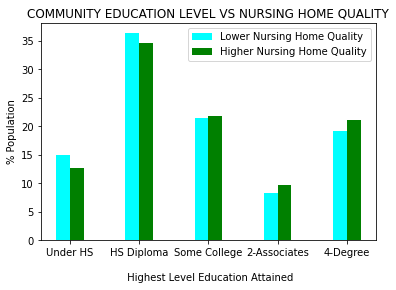

In [35]:
# VISUALIZATION 1
# Create a paired bar chart for high and low rated nursing homes along with population percentages for education level
# create values for tick marks, and desired width
x = np.arange(5)
width = 0.2

# plot data for bar type visualization
plt.bar(x-0.1, less_quality, width, color='cyan')
plt.bar(x+0.1, more_quality, width, color='green')
plt.xticks(x, ['Under HS', 'HS Diploma', 'Some College', '2-Associates', '4-Degree'])

# Add labels, legend, and title
plt.xlabel("\n Highest Level Education Attained")
plt.ylabel("% Population")
plt.legend(["Lower Nursing Home Quality", "Higher Nursing Home Quality"])
plt.title("COMMUNITY EDUCATION LEVEL VS NURSING HOME QUALITY")
plt.show()

Here does appear to be a difference in the education level of the overall community and the quality of nursing homes within it. Higher quality nursing homes appear to be more commonly found in communities with greater numbers of more educated people. 

2. Does state funding for medicaid relate to nursing home quality?

In [37]:
# Query all three state tables to get budget data, population data, and quality rating.
# Calcuate medicaid dollars per citizen using population information
q2 = """SELECT overall_rating as 'Quality Rating',
                ROUND(((PC_Medicaid * Millions)/ Population) * 1000000) as 'Medicaid Dollars Per Citizen' 
        FROM state JOIN state3 
            ON state.state = state3.state
                JOIN state2
            ON state.state = state2.state
    """
# Read sql into dataframe and view
df2= pd.read_sql(q2, conn)
df2.head()

,Quality Rating,Medicaid Dollars Per Citizen
0,3.85,438.0
1,3.66,176.0
2,3.28,269.0
3,2.99,230.0
4,3.28,448.0


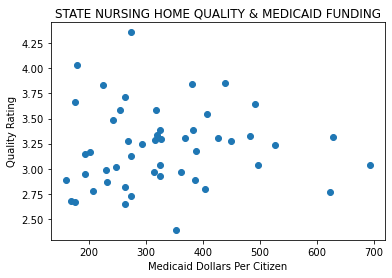

In [38]:
# VISUALZATION 2
# Create scatter plot of medicaid funds per citizen vs quality in nursing homes
plt.figure()
plt.scatter(df2['Medicaid Dollars Per Citizen'], df2['Quality Rating']) 
plt.xlabel('Medicaid Dollars Per Citizen')
plt.ylabel('Quality Rating')
plt.title('STATE NURSING HOME QUALITY & MEDICAID FUNDING')

plt.show()

3. How are average quality ratings for nursing homes impacted by simply having more nursing homes, or greater variability? 

In [40]:
# VISUALIZATION 3
# To capture a larger sample of this potential effect, will use county level data to increase sample size
# Query nursing home quality ratings from county tables and compare to nursing home counts for each county
q3 = """SELECT overall_rating, nursing_home_count
        FROM state"""

# Read sql into dataframe and view
df3= pd.read_sql(q3, conn)
df3.head()

,overall_rating,nursing_home_count
0,3.85,20
1,3.66,227
2,3.28,220
3,2.99,142
4,3.28,1176


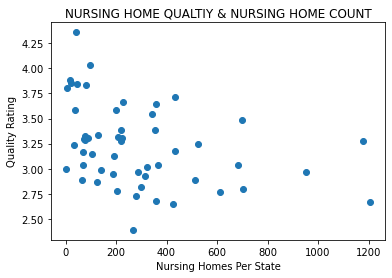

In [41]:
plt.figure()
plt.scatter(df3['nursing_home_count'], df3['overall_rating']) 
plt.xlabel('Nursing Homes Per State')
plt.ylabel('Quality Rating')
plt.title('NURSING HOME QUALTIY & NURSING HOME COUNT')

plt.show()

4. My experience suggests that one of most important factors of care is the ratio is staff availability or staff ratio to patients. The data I have saved does not include staff ratios, however it does have values representing the total hours time nursing staff per resident per day. Does the data show that having more potential time with nursing staff relates to higher overall quality?

In [42]:
# VISUALIZATION 4
# group ratings 1 through 5 and get average hours nursing staff per resident daily.

q5 = """SELECT 
        (SELECT AVG(total_nurse_hrspres) FROM county WHERE overall_rating <=1) AS "0-1",
        (SELECT AVG(total_nurse_hrspres) FROM county WHERE overall_rating > 1 AND overall_rating <=2 ) AS "1-2",
        (SELECT AVG(total_nurse_hrspres) FROM county WHERE overall_rating > 2 AND overall_rating <=3) AS "2-3",
        (SELECT AVG(total_nurse_hrspres) FROM county WHERE overall_rating > 3 AND overall_rating <=4) AS "3-4",
        (SELECT AVG(total_nurse_hrspres) FROM county WHERE overall_rating > 4) AS "4-5"
    """

df5 = pd.read_sql(q5, conn)
df5

,0-1,1-2,2-3,3-4,4-5
0,3.31882,3.590887,3.678061,3.899189,4.266955


In [43]:
rating = df5.iloc[0].values

Text(0.5, 1.0, 'NURSE HOURS PER RESIDENT & NURSING HOME QUALITY')

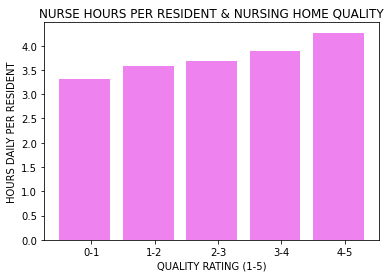

In [44]:
# Create bar chart, bars for each rating 1-5 and show average nursing staff hours per resident
x = np.arange(5)
width = 0.8

# plot data for bar type visualization
plt.bar(x-0.1, rating, width, color='violet')
plt.xticks(x, ['0-1', '1-2', '2-3', '3-4', '4-5'])

# Create labels
plt.xlabel('QUALITY RATING (1-5)')
plt.ylabel('HOURS DAILY PER RESIDENT')
plt.title('NURSE HOURS PER RESIDENT & NURSING HOME QUALITY')

5. How does quality rating relate to nursing staff turn-over?

In [49]:
# Query quality ratings of nursing homes with rates of nursing staff turnover at state level
q5 = """SELECT overall_rating, nursing_turnover
        FROM state
        WHERE nursing_turnover > 30
    """

df5 = pd.read_sql(q5, conn)
df5.head()

,overall_rating,nursing_turnover
0,3.85,53.36
1,3.66,47.54
2,3.28,55.52
3,2.99,55.11
4,3.28,49.73


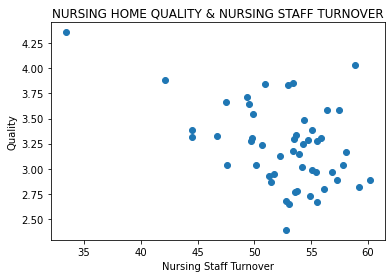

In [50]:
plt.figure()
plt.scatter(df5['nursing_turnover'],df5['overall_rating']) 
plt.ylabel('Quality')
plt.xlabel('Nursing Staff Turnover')
plt.title('NURSING HOME QUALITY & NURSING STAFF TURNOVER')

plt.show()

In [ ]:
# Close connection
conn.close()

## Summary

The completion of this project required a long list of skills. The transformations required included sub-setting, renaming, reindexing, adding new columns of calculated information based on other columns, dropping columns, multi-indexing, changing data types, string manipulation, applying column wise calculations to change values as needed, and using value counts to help build new tables at higher levels of scope. Many of these skills are familiar to me, but after repeated practice for this project, I no longer need to reference materials to perform most of these transformations. 

I think web scraping for sources was the most impactful of skills in that I learned to appreciate being playful and curious with web page information. I previously did not understand Inspector and was cautious of interacting with inspector and cautious with page url parameters. For this project, it was not enough to hope what I want to find would stick out and allow me to see it, I had to dig around. Using the inspector console view to dig through "GET" page requests and playing with parameters lead to a great amount of learning. I was able to essentially test the limits of parameters available to me and use that make the most of my own requests. 

Practicing SQL for the first time has been the next-most interesting skill this project has required. Building my queries and joining tables in the process came quickly, once I begun. I had to learn to make multiple select statements in one query to essentially create bins of discrete data, which was a first for me. I learned to query data with more than one constraint and read my queries into data frames for visualizations. 

**Cleansing Ethics** 

Working with nursing home data, which an emphasis on quality, is complex topic with a web of potential influence factors.  Finding the hint of any relationship between variables, is far from a finding a target for influencing nursing home quality. With that in mind, it is even more important data maintains its integrity for analysis purposes. My data sets were from dedicated organizations, and they required little to no major changes and had virtually no problematic or missing values. My supporting data sets were similar in quality.   

Nursing home quality was my target variable and I found it was heavily weighted in a mid-high range as most homes had good ratings. Nursing homes with the worst ratings, incredibly high rates of violations and complaints were few, but very extreme. It was temping to eliminate them from my set, however, to categorize them as outliers would be a misrepresentation. They were not outliers by any fluke and they represent a reality where things go very wrong and as such, they are of equal interest for this data. If I had chosen to cut loose 30 to even 300 data points out of over 15 thousand, I would only learn less about what may influence the range of quality across nursing homes. 
